# Double Variable Polynomial Regression

## Install and Import Dependencies

In [1]:
%pip install numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load Data

In [3]:
df = pd.read_csv('../DoubleVariablePolynomialRegression.ipynb/data/Fish.csv')

In [4]:
df.head()

,Height,Width,Weight
0,11.5200,4.0200,242.0
1,12.4800,4.3056,290.0
2,12.3778,4.6961,340.0
3,12.7300,4.4555,363.0
4,12.4440,5.1340,430.0


## Note: No NAN Values

In [5]:
df.isna().sum()

Height    0
Width     0
Weight    0
dtype: int64

## Normalize the Features

In [6]:
df['Height'] = (df['Height']-np.mean(df['Height']))/np.std(df['Height'])
df['Width'] = (df['Width']-np.mean(df['Width']))/np.std(df['Width'])
df.head()

,Height,Width,Weight
0,0.596579,-0.236529,242.0
1,0.821261,-0.066579,290.0
2,0.797341,0.165793,340.0
3,0.879771,0.022621,363.0
4,0.812835,0.426371,430.0


## Generate Random Test and Train Splits

In [7]:
seed = 420
train_fraction = 0.8
train = df.sample(frac=train_fraction, random_state=seed)
test = df.drop(train.index)

## Polynomial Regression Model

In [57]:
class PolynomialRegressionModel:
    def __init__(self, degree, q, lmbda):
        """
        Polynomial Regression Model for some particular degree.
        """
        self.train_errors = {}
        self.test_errors = {}
        self.q = q
        self.lmbda = lmbda
        self.degree = degree
        # Initialize Weights
        self.weights = np.random.rand(degree+1, degree+1)

    def print(self):
        result = []
        for i in range(self.degree+1):
            for j in range(self.degree+1):
                if(i+j<=self.degree):
                    result.append(
                        f"i={i}, j={j}, wij={self.weights[i][j]}"
                    )
        return result

    def calculate_loss(self, X_i, t_i):
        # print('inside self.calculate_loss()')
        assert type(X_i[0]) == np.float64 and type(t_i) == np.float64 and type(X_i[1]) == np.float64, "Types are not matching. Check!"

        a = X_i[0]
        b = X_i[1]
        t = t_i
        prediction = self.predict([(a, b)])
        # print('predicted:')
        # print(prediction)
        # print('expected')
        # print(t)

        grad = np.zeros_like(self.weights)
        grad.fill(0.0)
        for i in range(self.degree+1):
            for j in range(self.degree+1):
                if i + j <= self.degree:
                    grad[i][j] = (a**i)*(b**j)*(t - prediction)
        
        grad += (self.lmbda*self.q//2)*(np.abs(self.weights)**(self.q-1))
        # print('loss: ')
        # print(grad)
        return -1*grad

    def fit(self, X_train, y_train, X_test, y_test, lr=0.01, epochs=500, batch_size=20):
        """
        Fit the polynomial regression model using Batch Gradient Descent.

        Parameters:
        X_train: Input Feature variables.
        y_train: Target Variable
        X_test: Input Feature variables for test data
        y_test: Target Variables for test data
        lr: Learning Rate for Gradient Descent
        epochs: No of Epochs to train

        Returns:
        NA
        """
        print('Starting Training.....')
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        # print(X_train.head())
        for epoch in range(epochs):
            count = 0
            loss = np.zeros_like(self.weights)
            # print(X_train.shape[0])
            
            for i in range(X_train.shape[0]):
                # print('sample')
                # print(X_train[i][0])
                # print(X_train[i][1])
                # print(y_train[i])
                if epoch == 0 or (epoch*epochs+i)%(X_train.shape[0]/2):
                    self.train_errors[epoch*epochs + i] = self.calculate_error(X_train, y_train)
                    self.test_errors[epoch*epochs + i] = self.calculate_error(X_test, y_test)

                X_i = (X_train[i][0],X_train[i][1])
                t_i =  y_train[i]

                if count%batch_size == 0:
                    loss /= batch_size
                    # print('loss: ')
                    # print(loss)
                    # print(self.weights)
                    # self.weights += (self.lmbda*self.q//2)*(np.abs(self.weights)**(self.q-1))
                    self.weights -= lr*loss
                    # print(self.weights)
                    loss = np.zeros_like(self.weights)
                else:
                    loss += self.calculate_loss(X_i, t_i)
            
                count+=1
            if epoch%(epochs/10) == 0:
                print(f"epoch: {epoch}")
                print(f"Error: {self.calculate_error(X_train, y_train)}")

        return

    def calculate_error(self, X_test, y_test):
        """
        Find the error of the model on some data.

        Parameters:
        X_test: The sample Input Feature.
        y_test: The sample Target Feature.

        Returns:
        A float value that is the MSE b/w the predicted outputs and the target outputs.
        """
        X_test = np.array(X_test)
        y_test = np.array(y_test)
        predictions = self.predict(X_test)
        mse = np.mean(
            (predictions-y_test)**2
        )
        return mse

    def predict(self, X_test):
        """
        Make Predictions using the trained model.

        Parameters:
        X_test: The sample Input Features.

        Returns:
        A numpy Array with the predicted target variable value for each of the samples having
        same dimensions as X_test.
        """
        result = [] 
        for sample in X_test:
            assert type(sample[0]) == np.float64 and type(sample[1]) == np.float64, "Variable doesn't have the required type!"
            degree = 2
            a = sample[0]
            b = sample[1]
            y = 0
            for i in range(degree+1):
                for j in range(degree+1):
                    if i + j <= degree:
                        y += self.weights[i][j]*(a**i)*(b**j)
            result.append(y)
        return np.array(result)

## Grid Search

## Without Regularization

In [15]:
import json

In [ ]:
model = PolynomialRegressionModel(degree=5, q=2, lmbda=0.1)
model.fit(train.drop(['Weight'], axis=1), train['Weight'], test.drop(['Weight'], axis=1), test['Weight'], lr=0.001, epochs=200, batch_size=2)

In [52]:
errors = []
for degree in [2, 3, 4, 5, 6, 7, 8, 9]:
    for lr in [0.001]:
        print(f"doing: {degree}, {lr} for 500 epochs")
        model = PolynomialRegressionModel(degree=degree, q=0, lmbda=0)
        model.fit(train.drop(['Weight'], axis=1), train['Weight'], test.drop(['Weight'], axis=1), test['Weight'], lr=lr, epochs=500, batch_size=20)
        errors.append({
                    "degree": degree,
                    "lr": lr,
                    "test_errors: ": model.test_errors,
                    "train_errors: ": model.train_errors
                })
json_obj = json.dumps(errors)
with open('double_noreg.json', 'w') as fp:
    fp.write(json_obj)

doing: 2, 0.001 for 500 epochs
Starting Training.....
epoch: 0
Error: 255118.8626926418


/tmp/ipykernel_15680/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 92058.21256441282
epoch: 100
Error: 58513.496532683304
epoch: 150
Error: 43510.66539783813
epoch: 200
Error: 35207.14509006875
epoch: 250
Error: 30038.096208575214
epoch: 300
Error: 26567.58959536274
epoch: 350
Error: 24126.033690334963
epoch: 400
Error: 22357.13982562554
epoch: 450
Error: 21049.73325589002
doing: 3, 0.001 for 500 epochs
Starting Training.....
epoch: 0
Error: 254399.47427047873


/tmp/ipykernel_15680/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 91766.07591894148
epoch: 100
Error: 58360.580154301344
epoch: 150
Error: 43418.86267678028
epoch: 200
Error: 35147.27248357093
epoch: 250
Error: 29997.432715834617
epoch: 300
Error: 26539.642500606114
epoch: 350
Error: 24106.980457990318
epoch: 400
Error: 22344.487746708724
epoch: 450
Error: 21041.753463058038
doing: 4, 0.001 for 500 epochs
Starting Training.....
epoch: 0
Error: 253888.9025071599


/tmp/ipykernel_15680/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 91681.99826566862
epoch: 100
Error: 58338.0320925231
epoch: 150
Error: 43412.018446794995
epoch: 200
Error: 35144.03032336456
epoch: 250
Error: 29994.395296860792
epoch: 300
Error: 26536.030770916295
epoch: 350
Error: 24102.76874220085
epoch: 400
Error: 22339.830159361125
epoch: 450
Error: 21036.816830880354
doing: 5, 0.001 for 500 epochs
Starting Training.....
epoch: 0
Error: 253385.0021989639


/tmp/ipykernel_15680/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 91691.17533351616
epoch: 100
Error: 58365.77854493964
epoch: 150
Error: 43436.5485567745
epoch: 200
Error: 35163.50556915314
epoch: 250
Error: 30009.306924954537
epoch: 300
Error: 26547.25404912396
epoch: 350
Error: 24111.11549658592
epoch: 400
Error: 22345.9578330464
epoch: 450
Error: 21041.234625997204
doing: 6, 0.001 for 500 epochs
Starting Training.....
epoch: 0
Error: 254139.84540369155


/tmp/ipykernel_15680/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 91818.28776746226
epoch: 100
Error: 58383.998617557205
epoch: 150
Error: 43427.95247171854
epoch: 200
Error: 35149.9300779361
epoch: 250
Error: 29996.36721708843
epoch: 300
Error: 26535.94190862271
epoch: 350
Error: 24101.254799579365
epoch: 400
Error: 22337.18875028066
epoch: 450
Error: 21033.254358142887
doing: 7, 0.001 for 500 epochs
Starting Training.....
epoch: 0
Error: 253679.79963959783


/tmp/ipykernel_15680/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 91777.4216288684
epoch: 100
Error: 58399.26200169206
epoch: 150
Error: 43449.31378147817
epoch: 200
Error: 35167.23590674096
epoch: 250
Error: 30008.87833214113
epoch: 300
Error: 26544.882967395584
epoch: 350
Error: 24107.88108333737
epoch: 400
Error: 22342.409696581428
epoch: 450
Error: 21037.657596478515
doing: 8, 0.001 for 500 epochs
Starting Training.....
epoch: 0
Error: 254957.33410616333


/tmp/ipykernel_15680/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 91785.70156564696
epoch: 100
Error: 58357.32243726237
epoch: 150
Error: 43413.229375574825
epoch: 200
Error: 35141.35430849622
epoch: 250
Error: 29991.600091126416
epoch: 300
Error: 26533.932659650975
epoch: 350
Error: 24101.37637088279
epoch: 400
Error: 22338.978667222204
epoch: 450
Error: 21036.341104467
doing: 9, 0.001 for 500 epochs
Starting Training.....
epoch: 0
Error: 254499.74816082424


/tmp/ipykernel_15680/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 91909.88837277627
epoch: 100
Error: 58466.82113324567
epoch: 150
Error: 43500.10234278551
epoch: 200
Error: 35210.43612801893
epoch: 250
Error: 30046.62377043319
epoch: 300
Error: 26577.808750577475
epoch: 350
Error: 24136.433780836276
epoch: 400
Error: 22367.083673646437
epoch: 450
Error: 21058.979465835982


# Code to find the best degree

In [9]:
import json

with open('double_noreg.json', 'r') as fp:
    data = json.load(fp)

best_overall_configuration = {
    'best_degree'
    'best_epoch': None,
    'best_test_loss': float('inf')  # Set to positive infinity initially
}

# Perform grid search
for entry in data:
    lr = entry['lr']
    test_errors = entry['test_errors: ']

    for epoch in test_errors:
        error = test_errors[epoch]

        # Update the best overall configuration
        if error < best_overall_configuration['best_test_loss']:
            best_overall_configuration['best_test_loss'] = error
            best_overall_configuration['best_degree'] = entry['degree']
            best_overall_configuration['best_epoch'] = epoch

# Display the best overall configuration
print("Best Overall Configuration:")
print(f"Best Degree: {best_overall_configuration['best_degree']}")
print(f"Best Test Loss: {best_overall_configuration['best_test_loss']}")
print(f"Epoch: {best_overall_configuration['best_epoch']}")


Best Overall Configuration:
Best Degree: 7
Best Test Loss: 50574.16299044137
Epoch: 249621


## With Regularization

In [10]:
from contextlib import contextmanager,redirect_stderr,redirect_stdout
import json
from os import devnull

@contextmanager
def suppress_stdout_stderr():
    """A context manager that redirects stdout and stderr to devnull"""
    with open(devnull, 'w') as fnull:
        with redirect_stderr(fnull) as err, redirect_stdout(fnull) as out:
            yield (err, out)

In [11]:
import time
errors = []
# Note this should be chosen from analysis of previous grid search without regularization
best_fit_degree = 7
cnt = 1
start = time.time()
for degree in [best_fit_degree]:  
    for lr in [0.001]:
        for q in [0.5, 1, 2, 4]:
            for batch_size in [20, 1]:
                for lmbda in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
                    with open('logs.txt', 'a') as f:
                        f.write(f"{(float(cnt)*100.0)//(72)}%, {time.time()-start}, {degree}, {lr}, {q}, {batch_size}, {lmbda}\n")
                    # print(f"doing: {degree}, {lr}, {q}, {batch_size} for 500 epochs")
                    # Getting rid of the logs
                    with suppress_stdout_stderr():
                        model = PolynomialRegressionModel(degree=degree, q=q, lmbda=lmbda)
                        model.fit(train.drop(['Weight'], axis=1), train['Weight'], test.drop(['Weight'], axis=1), test['Weight'], lr=lr, epochs=50, batch_size=batch_size)              
                    # sys.stdout = save_stdout
                    # sys.stderr = save_stderr
                    cnt += 1
                    errors.append({
                        "degree": degree,
                        "lr": lr,
                        "q": q, 
                        "lmbda": lmbda,
                        "batch_size": batch_size,
                        "test_errors: ": model.test_errors,
                        "train_errors: ": model.train_errors
                    })
                    # print(errors)

with open('double_withreg.json', 'w') as fp:
    json.dump(errors, fp)

# Find the best hyperparameters

In [16]:
import json

with open('double_withreg.json', 'r') as fp:
    data = json.load(fp)

# Dictionary to store the best models for each value of q
best_models_by_q = {0.5: None, 1: None, 2: None, 4: None}

# Variables to store the best models for batch_size 1 and 20
best_model_batch_size_1 = None
best_model_batch_size_20 = None

# Variables to store the best 4 models overall
best_models_overall = [None] * 4
best_test_losses = [float('inf')] * 4

# Perform grid search
for entry in data:
    degree = entry['degree']
    lr = entry['lr']
    lmbda = entry['lmbda']
    q = entry['q']
    batch_size = entry['batch_size']
    test_errors = entry['test_errors: ']
    best_epoch = min(test_errors, key=test_errors.get)  # Corrected line

    # Find the best models for each value of q
    if q in best_models_by_q:
        if best_models_by_q[q] is None or test_errors[best_epoch] < best_models_by_q[q]['best_test_loss']:
            best_models_by_q[q] = {
                'best_degree': degree,
                'best_lr': lr,
                'best_epoch': best_epoch,  # Use the correct epoch here
                'best_test_loss': test_errors[best_epoch],
                'best_lmbda': lmbda,
                'best_batch_size': batch_size
            }

    # Find the best model for batch_size 1 and 20
    if batch_size == 1:
        if best_model_batch_size_1 is None or test_errors[best_epoch] < best_model_batch_size_1['best_test_loss']:
            best_model_batch_size_1 = {
                'best_degree': degree,
                'best_lr': lr,
                'best_epoch': best_epoch,  # Use the correct epoch here
                'best_test_loss': test_errors[best_epoch],
                'best_lmbda': lmbda,
                'best_batch_size': batch_size,
                'q': q  # Include the value of q
            }
    elif batch_size == 20:
        if best_model_batch_size_20 is None or test_errors[best_epoch] < best_model_batch_size_20['best_test_loss']:
            best_model_batch_size_20 = {
                'best_degree': degree,
                'best_lr': lr,
                'best_epoch': best_epoch,  # Use the correct epoch here
                'best_test_loss': test_errors[best_epoch],
                'best_lmbda': lmbda,
                'best_batch_size': batch_size,
                'q': q  # Include the value of q
            }

    # Update the best 4 models overall
    for i, (best_model, best_test_loss) in enumerate(zip(best_models_overall, best_test_losses)):
        if best_model is None or test_errors[best_epoch] < best_test_loss:
            best_models_overall[i] = {
                'best_degree': degree,
                'best_lr': lr,
                'best_epoch': best_epoch,  # Use the correct epoch here
                'best_test_loss': test_errors[best_epoch],
                'best_lmbda': lmbda,
                'best_batch_size': batch_size,
                'q': q  # Include the value of q
            }
            best_test_losses[i] = test_errors[best_epoch]
            break  # Exit the loop after updating the first empty position

# Display results
print("Best models for each value of q:")
for q, best_model in best_models_by_q.items():
    print(f"q={q}: Degree={best_model['best_degree']}, Learning Rate={best_model['best_lr']}, Lambda={best_model['best_lmbda']}, Batch Size={best_model['best_batch_size']}, Epoch={best_model['best_epoch']}, Test Loss={best_model['best_test_loss']}")

print("\nBest model for batch_size 1:")
print(f"Degree={best_model_batch_size_1['best_degree']}, Learning Rate={best_model_batch_size_1['best_lr']}, Lambda={best_model_batch_size_1['best_lmbda']}, Batch Size={best_model_batch_size_1['best_batch_size']}, Epoch={best_model_batch_size_1['best_epoch']}, Test Loss={best_model_batch_size_1['best_test_loss']}, q={best_model_batch_size_1['q']}")

print("\nBest model for batch_size 20:")
print(f"Degree={best_model_batch_size_20['best_degree']}, Learning Rate={best_model_batch_size_20['best_lr']}, Lambda={best_model_batch_size_20['best_lmbda']}, Batch Size={best_model_batch_size_20['best_batch_size']}, Epoch={best_model_batch_size_20['best_epoch']}, Test Loss={best_model_batch_size_20['best_test_loss']}, q={best_model_batch_size_20['q']}")

print("\nBest 4 models overall:")
for i, best_model in enumerate(best_models_overall):
    print(f"Rank {i + 1}: Degree={best_model['best_degree']}, Learning Rate={best_model['best_lr']}, Lambda={best_model['best_lmbda']}, Batch Size={best_model['best_batch_size']}, Epoch={best_model['best_epoch']}, Test Loss={best_model['best_test_loss']}, q={best_model['q']}")


Best models for each value of q:
q=0.5: Degree=7, Learning Rate=0.001, Lambda=0.5, Batch Size=20, Epoch=2571, Test Loss=139793.0962370393
q=1: Degree=7, Learning Rate=0.001, Lambda=0.0, Batch Size=20, Epoch=2571, Test Loss=139781.55365061367
q=2: Degree=7, Learning Rate=0.001, Lambda=1.0, Batch Size=20, Epoch=2571, Test Loss=125537.749596721
q=4: Degree=7, Learning Rate=0.001, Lambda=0.3, Batch Size=20, Epoch=2571, Test Loss=140085.22385513445

Best model for batch_size 1:
Degree=7, Learning Rate=0.001, Lambda=0.4, Batch Size=1, Epoch=0, Test Loss=363088.41025412834, q=4

Best model for batch_size 20:
Degree=7, Learning Rate=0.001, Lambda=1.0, Batch Size=20, Epoch=2571, Test Loss=125537.749596721, q=2

Best 4 models overall:
Rank 1: Degree=7, Learning Rate=0.001, Lambda=1.0, Batch Size=20, Epoch=2571, Test Loss=125537.749596721, q=2
Rank 2: Degree=7, Learning Rate=0.001, Lambda=0.5, Batch Size=20, Epoch=2571, Test Loss=139862.48767464896, q=2
Rank 3: Degree=7, Learning Rate=0.001, Lamb

## Plots

## Plot for 9 degrees and 4 best regularized models

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create and save surface plot
def create_surface_plot(model, X, Y, Z, title, save_path):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    # Scatter plot for training and testing data
    ax.scatter(train.to_numpy()[:, 0], train.to_numpy()[:, 1], train['Weight'].to_numpy(), color='blue', marker='o')
    ax.scatter(test.to_numpy()[:, 0], test.to_numpy()[:, 1], test['Weight'].to_numpy(), color='red', marker='o')

    ax.set_xlabel('Height')
    ax.set_ylabel('Width')
    ax.set_zlabel('Predicted Weight')

    plt.title(title)
    plt.savefig(save_path)
    plt.close()


In [24]:
# Loop through degrees and create surface plots
for deg in [2, 3, 4, 5, 6, 7, 8, 9]:
    # model = PolynomialRegressionModel(degree=degree, q=0, lmbda=0)
    # model.fit(train.drop(['Weight'], axis=1), train['Weight'], test.drop(['Weight'], axis=1), test['Weight'], lr=0.01, epochs=500, batch_size=20)
    print(deg)
    model = PolynomialRegressionModel(degree=deg, q=0.0, lmbda=0.0)
    model.fit(train.drop(['Weight'], axis=1), train['Weight'], test.drop(['Weight'], axis=1), test['Weight'], lr=0.001, epochs=200, batch_size=20)

    # Generate sample data for the surface plot
    a_values = np.linspace(min(train.to_numpy()[:, 0]), max(train.to_numpy()[:, 0]), 100)
    b_values = np.linspace(min(train.to_numpy()[:, 1]), max(train.to_numpy()[:, 1]), 100)
    a_mesh, b_mesh = np.meshgrid(a_values, b_values)

    prediction_points = np.c_[a_mesh.ravel(), b_mesh.ravel()]
    predictions = model.predict(prediction_points)
    predictions_surface = predictions.reshape(a_mesh.shape)

    # Create and save the surface plot
    title = f'Regression Model - Degree {deg}'
    save_path = f'surface_plot_degree_{deg}.png'
    create_surface_plot(model, a_mesh, b_mesh, predictions_surface, title, save_path)

# Now, repeat the process for the best 4 regularized models overall
best_models = [
    {'degree': 7, 'q': 2, 'lmbda': 1.0},
    {'degree': 7, 'q': 2, 'lmbda': 0.5},
    {'degree': 7, 'q': 2, 'lmbda': 0.1},
    {'degree': 7, 'q': 2, 'lmbda': 0.2}
]

for best_model in best_models:
    degree = best_model['degree']
    q = best_model['q']
    lmbda = best_model['lmbda']

    model = PolynomialRegressionModel(degree=degree, q=q, lmbda=lmbda)
    model.fit(np.array(train.drop(['Weight'], axis=1)), np.array(train['Weight']), np.array(test.drop(['Weight'], axis=1)), np.array(test['Weight']), lr=0.01, epochs=500, batch_size=20)

    # Generate sample data for the surface plot
    a_values = np.linspace(min(train.to_numpy()[:, 0]), max(train.to_numpy()[:, 0]), 100)
    b_values = np.linspace(min(test.to_numpy()[:, 1]), max(train.to_numpy()[:, 1]), 100)
    a_mesh, b_mesh = np.meshgrid(a_values, b_values)

    prediction_points = np.c_[a_mesh.ravel(), b_mesh.ravel()]
    predictions = model.predict(prediction_points)
    predictions_surface = predictions.reshape(a_mesh.shape)

    # Create and save the surface plot
    title = f'Regularized Model - Degree {degree}, q={q}, Lambda={lmbda}'
    save_path = f'surface_plot_regularized_degree_{degree}_q_{q}_lambda_{lmbda}.png'
    create_surface_plot(model, a_mesh, b_mesh, predictions_surface, title, save_path)

2
Starting Training.....
epoch: 0
Error: 255237.56334614524


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 20
Error: 147449.55484399028
epoch: 40
Error: 104516.02211193755
epoch: 60
Error: 82175.49581695697
epoch: 80
Error: 68135.58086861139
epoch: 100
Error: 58355.82734683499
epoch: 120
Error: 51156.023398160316
epoch: 140
Error: 45666.26970650353
epoch: 160
Error: 41367.60050403641
epoch: 180
Error: 37926.27238762491
3
Starting Training.....
epoch: 0
Error: 254425.2289556951


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 20
Error: 147196.4335146643
epoch: 40
Error: 104460.55089109502
epoch: 60
Error: 82202.74569467678
epoch: 80
Error: 68200.6532942373
epoch: 100
Error: 58437.51053190426
epoch: 120
Error: 51243.09307607084
epoch: 140
Error: 45752.5638881353
epoch: 160
Error: 41449.80624750349
epoch: 180
Error: 38002.74842067212
4
Starting Training.....
epoch: 0
Error: 254601.75726832126


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 20
Error: 147246.11962717382
epoch: 40
Error: 104449.06627947415
epoch: 60
Error: 82160.10723265613
epoch: 80
Error: 68142.83575260674
epoch: 100
Error: 58373.63784336918
epoch: 120
Error: 51178.4534425751
epoch: 140
Error: 45690.15668985485
epoch: 160
Error: 41391.23654347987
epoch: 180
Error: 37948.772694513566
5
Starting Training.....
epoch: 0
Error: 254764.34095110963


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 20
Error: 147168.7420096372
epoch: 40
Error: 104353.32119909217
epoch: 60
Error: 82085.64809699768
epoch: 80
Error: 68090.40371893717
epoch: 100
Error: 58337.644961770246
epoch: 120
Error: 51153.74757271391
epoch: 140
Error: 45672.97206040873
epoch: 160
Error: 41378.9846193091
epoch: 180
Error: 37939.70614010996
6
Starting Training.....
epoch: 0
Error: 253826.1833691892


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 20
Error: 147046.6093333854
epoch: 40
Error: 104404.3100109471
epoch: 60
Error: 82162.34707309428
epoch: 80
Error: 68161.80005996356
epoch: 100
Error: 58399.24388334595
epoch: 120
Error: 51206.51454737671
epoch: 140
Error: 45718.57999320557
epoch: 160
Error: 41418.867981656
epoch: 180
Error: 37974.96371592298
7
Starting Training.....
epoch: 0
Error: 255266.79887823408


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 20
Error: 147651.4854938671
epoch: 40
Error: 104729.64894436124
epoch: 60
Error: 82368.80075188621
epoch: 80
Error: 68305.42166421875
epoch: 100
Error: 58504.72805778453
epoch: 120
Error: 51287.04610026703
epoch: 140
Error: 45782.04839802353
epoch: 160
Error: 41470.27633266183
epoch: 180
Error: 38017.586915137035
8
Starting Training.....
epoch: 0
Error: 254817.21688651896


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 20
Error: 147335.67905366374
epoch: 40
Error: 104531.05025923709
epoch: 60
Error: 82250.26425414834
epoch: 80
Error: 68237.43042603858
epoch: 100
Error: 58467.437444654184
epoch: 120
Error: 51267.83874083185
epoch: 140
Error: 45773.10806386402
epoch: 160
Error: 41466.849637384694
epoch: 180
Error: 38016.83939935694
9
Starting Training.....
epoch: 0
Error: 254182.16283091035


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 20
Error: 147248.96517449417
epoch: 40
Error: 104528.62770442826
epoch: 60
Error: 82241.60747753865
epoch: 80
Error: 68213.3600644427
epoch: 100
Error: 58433.284139402116
epoch: 120
Error: 51229.317961122164
epoch: 140
Error: 45734.11076237523
epoch: 160
Error: 41429.652783329075
epoch: 180
Error: 37982.6221161172
Starting Training.....
epoch: 0
Error: 190018.23191754316


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 306470.3792405295
epoch: 100
Error: 6622277.376602867
epoch: 150
Error: 72554664.76418932
epoch: 200
Error: 650083762.1661656
epoch: 250
Error: 5649449982.401103
epoch: 300
Error: 49703316467.175285
epoch: 350
Error: 445683336236.1636
epoch: 400
Error: 4059945689604.3467
epoch: 450
Error: 37350167264242.414
Starting Training.....
epoch: 0
Error: 191068.07270567407


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 19872.417435140196
epoch: 100
Error: 16889.85379953804
epoch: 150
Error: 16393.582393361146
epoch: 200
Error: 16165.292049915115
epoch: 250
Error: 16004.20427704389
epoch: 300
Error: 15874.7498213333
epoch: 350
Error: 15765.074187276174
epoch: 400
Error: 15669.335425034778
epoch: 450
Error: 15584.010880710139
Starting Training.....
epoch: 0
Error: 191063.62949891845


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 19860.041006503932
epoch: 100
Error: 16881.200874061306
epoch: 150
Error: 16386.2909109455
epoch: 200
Error: 16158.876428003668
epoch: 250
Error: 15998.431355365223
epoch: 300
Error: 15869.47238936845
epoch: 350
Error: 15760.192337409128
epoch: 400
Error: 15664.779181290305
epoch: 450
Error: 15579.730078259843
Starting Training.....
epoch: 0
Error: 191257.78351012952


/tmp/ipykernel_21601/3202280365.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 50
Error: 19873.959389383304
epoch: 100
Error: 16889.05980250182
epoch: 150
Error: 16393.681847304768
epoch: 200
Error: 16166.189052747433
epoch: 250
Error: 16005.636120680767
epoch: 300
Error: 15876.520552077027
epoch: 350
Error: 15767.049378684753
epoch: 400
Error: 15671.42424725847
epoch: 450
Error: 15586.152190932393


## Comparing Regularized with Unregularized

Starting Training.....
epoch: 0
Error: 254152.7074122441


/tmp/ipykernel_21601/3250447016.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 5
Error: 215216.1604078565
epoch: 10
Error: 184952.11956610426
epoch: 15
Error: 161162.4605572484
epoch: 20
Error: 142224.17291383396
epoch: 25
Error: 126938.62865131172
epoch: 30
Error: 114420.26157637885
epoch: 35
Error: 104014.37455197069
epoch: 40
Error: 95236.47145069145
epoch: 45
Error: 87727.49227128424
=========logs:=========
[['i=0, j=0, wij=77.12027931444128', 'i=0, j=1, wij=82.82301336510272', 'i=0, j=2, wij=73.14036779086146', 'i=0, j=3, wij=200.12541719767194', 'i=0, j=4, wij=134.01975278532282', 'i=0, j=5, wij=576.3367876829235', 'i=0, j=6, wij=274.89642255418863', 'i=0, j=7, wij=1796.5971408389696', 'i=1, j=0, wij=66.31492834913925', 'i=1, j=1, wij=39.30697139642253', 'i=1, j=2, wij=122.851818036001', 'i=1, j=3, wij=25.329155242574032', 'i=1, j=4, wij=334.48768954053764', 'i=1, j=5, wij=-40.37465366230124', 'i=1, j=6, wij=1038.9895585630582', 'i=2, j=0, wij=66.00984204530863', 'i=2, j=1, wij=116.2513484160791', 'i=2, j=2, wij=21.11725217451333', 'i=2, j=3, wij=265

/tmp/ipykernel_21601/3250447016.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 5
Error: 216157.8169976911
epoch: 10
Error: 187079.23103180277
epoch: 15
Error: 164659.31719989976
epoch: 20
Error: 147080.29423670535
epoch: 25
Error: 133052.60237259782
epoch: 30
Error: 121657.92008839487
epoch: 35
Error: 112239.22570977377
epoch: 40
Error: 104323.7599571377
epoch: 45
Error: 97569.00346597868
=========logs:=========
[['i=0, j=0, wij=77.12027931444128', 'i=0, j=1, wij=82.82301336510272', 'i=0, j=2, wij=73.14036779086146', 'i=0, j=3, wij=200.12541719767194', 'i=0, j=4, wij=134.01975278532282', 'i=0, j=5, wij=576.3367876829235', 'i=0, j=6, wij=274.89642255418863', 'i=0, j=7, wij=1796.5971408389696', 'i=1, j=0, wij=66.31492834913925', 'i=1, j=1, wij=39.30697139642253', 'i=1, j=2, wij=122.851818036001', 'i=1, j=3, wij=25.329155242574032', 'i=1, j=4, wij=334.48768954053764', 'i=1, j=5, wij=-40.37465366230124', 'i=1, j=6, wij=1038.9895585630582', 'i=2, j=0, wij=66.00984204530863', 'i=2, j=1, wij=116.2513484160791', 'i=2, j=2, wij=21.11725217451333', 'i=2, j=3, wij=26

/tmp/ipykernel_21601/3250447016.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 5
Error: 215839.974371822
epoch: 10
Error: 186874.22154624216
epoch: 15
Error: 164535.29890727808
epoch: 20
Error: 147014.64875190705
epoch: 25
Error: 133029.2022769767
epoch: 30
Error: 121665.21415585522
epoch: 35
Error: 112268.89619293992
epoch: 40
Error: 104369.78014563821
epoch: 45
Error: 97626.97542158254
=========logs:=========
[['i=0, j=0, wij=77.12027931444128', 'i=0, j=1, wij=82.82301336510272', 'i=0, j=2, wij=73.14036779086146', 'i=0, j=3, wij=200.12541719767194', 'i=0, j=4, wij=134.01975278532282', 'i=0, j=5, wij=576.3367876829235', 'i=0, j=6, wij=274.89642255418863', 'i=0, j=7, wij=1796.5971408389696', 'i=1, j=0, wij=66.31492834913925', 'i=1, j=1, wij=39.30697139642253', 'i=1, j=2, wij=122.851818036001', 'i=1, j=3, wij=25.329155242574032', 'i=1, j=4, wij=334.48768954053764', 'i=1, j=5, wij=-40.37465366230124', 'i=1, j=6, wij=1038.9895585630582', 'i=2, j=0, wij=66.00984204530863', 'i=2, j=1, wij=116.2513484160791', 'i=2, j=2, wij=21.11725217451333', 'i=2, j=3, wij=265

/tmp/ipykernel_21601/3250447016.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 5
Error: 216002.8759698433
epoch: 10
Error: 186926.01390828195
epoch: 15
Error: 164510.1457962363
epoch: 20
Error: 146936.52450375838
epoch: 25
Error: 132914.94445174767
epoch: 30
Error: 121526.65856926977
epoch: 35
Error: 112114.37057132872
epoch: 40
Error: 104205.14943461242
epoch: 45
Error: 97456.37363946243
=========logs:=========
[['i=0, j=0, wij=77.12027931444128', 'i=0, j=1, wij=82.82301336510272', 'i=0, j=2, wij=73.14036779086146', 'i=0, j=3, wij=200.12541719767194', 'i=0, j=4, wij=134.01975278532282', 'i=0, j=5, wij=576.3367876829235', 'i=0, j=6, wij=274.89642255418863', 'i=0, j=7, wij=1796.5971408389696', 'i=1, j=0, wij=66.31492834913925', 'i=1, j=1, wij=39.30697139642253', 'i=1, j=2, wij=122.851818036001', 'i=1, j=3, wij=25.329155242574032', 'i=1, j=4, wij=334.48768954053764', 'i=1, j=5, wij=-40.37465366230124', 'i=1, j=6, wij=1038.9895585630582', 'i=2, j=0, wij=66.00984204530863', 'i=2, j=1, wij=116.2513484160791', 'i=2, j=2, wij=21.11725217451333', 'i=2, j=3, wij=26

/tmp/ipykernel_21601/3250447016.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i][j] = (a**i)*(b**j)*(t - prediction)


epoch: 5
Error: 216878.88315720196
epoch: 10
Error: 187711.50747163352
epoch: 15
Error: 165220.52145220368
epoch: 20
Error: 147583.58244461278
epoch: 25
Error: 133507.8673276213
epoch: 30
Error: 122072.70626192083
epoch: 35
Error: 112619.37577630836
epoch: 40
Error: 104673.87291275909
epoch: 45
Error: 97892.76040224325
=========logs:=========
[['i=0, j=0, wij=77.12027931444128', 'i=0, j=1, wij=82.82301336510272', 'i=0, j=2, wij=73.14036779086146', 'i=0, j=3, wij=200.12541719767194', 'i=0, j=4, wij=134.01975278532282', 'i=0, j=5, wij=576.3367876829235', 'i=0, j=6, wij=274.89642255418863', 'i=0, j=7, wij=1796.5971408389696', 'i=1, j=0, wij=66.31492834913925', 'i=1, j=1, wij=39.30697139642253', 'i=1, j=2, wij=122.851818036001', 'i=1, j=3, wij=25.329155242574032', 'i=1, j=4, wij=334.48768954053764', 'i=1, j=5, wij=-40.37465366230124', 'i=1, j=6, wij=1038.9895585630582', 'i=2, j=0, wij=66.00984204530863', 'i=2, j=1, wij=116.2513484160791', 'i=2, j=2, wij=21.11725217451333', 'i=2, j=3, wij=2

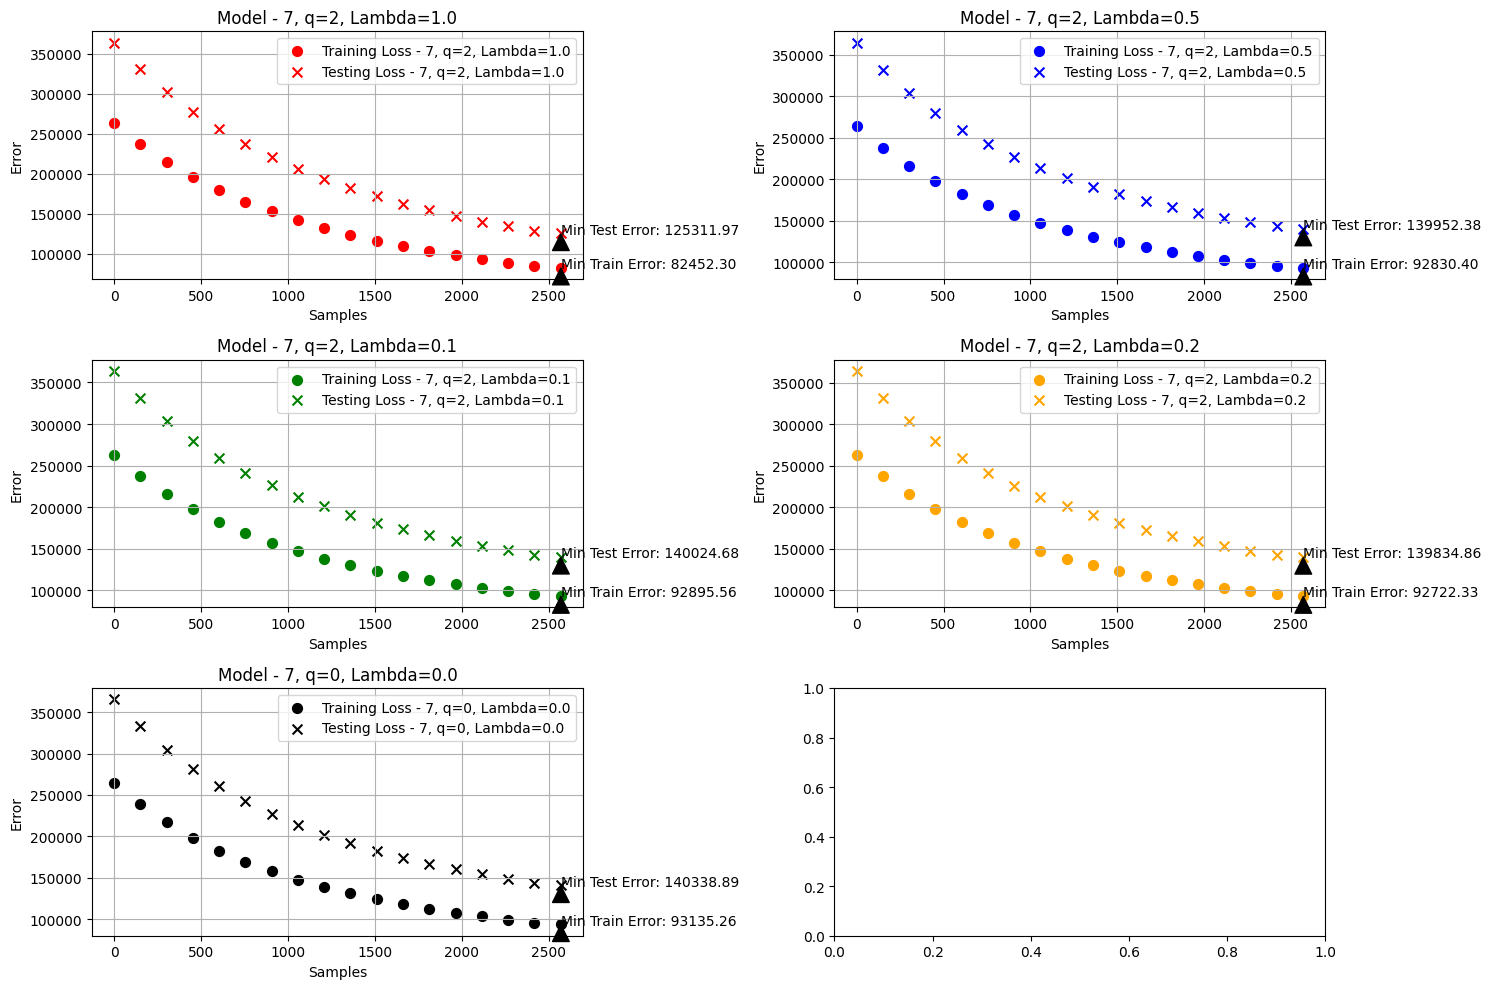

In [58]:
import matplotlib.pyplot as plt

# Define the models with their configurations
models = [
    {'degree': 7, 'lr': 0.001, 'lmbda': 1.0, 'batch_size': 20, 'epoch': 2571, 'q': 2, 'color':'red'},
    {'degree': 7, 'lr': 0.001, 'lmbda': 0.5, 'batch_size': 20, 'epoch': 2571, 'q': 2, 'color':'blue'},
    {'degree': 7, 'lr': 0.001, 'lmbda': 0.1, 'batch_size': 20, 'epoch': 2571, 'q': 2, 'color':'green'},
    {'degree': 7, 'lr': 0.001, 'lmbda': 0.2, 'batch_size': 20, 'epoch': 2571, 'q': 2, 'color':'orange'},
    {'degree': 7, 'lr': 0.001, 'lmbda': 0.0, 'batch_size': 20, 'epoch': 2571, 'q': 0, 'color':'black'},
]

# Function to draw subplots for each model within the same figure
def draw_subplots(models):
    logs = []
    # Define the number of rows and columns for subplots
    num_rows = 3  # Adjust as needed
    num_cols = 2  # Adjust as needed

    # Create a new figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Flatten the axes array to simplify indexing
    axes = axes.flatten()

    for i, model in enumerate(models):
        degree = model['degree']
        lr = model['lr']
        lmbda = model['lmbda']
        batch_size = model['batch_size']
        epoch = model['epoch']
        q = model['q']

        # Your code for loading the model goes here
        model_instance = PolynomialRegressionModel(degree=degree, q=q, lmbda=lmbda)
        model_instance.fit(train.drop(['Weight'], axis=1), train['Weight'], test.drop(['Weight'], axis=1), test['Weight'], lr=lr, epochs=500, batch_size=batch_size)
        logs.append(model_instance.print())
        # Plotting
        epochs = list(model_instance.train_errors.keys())
        train_errors = list(model_instance.train_errors.values())
        test_errors = list(model_instance.test_errors.values())

        # Plot training errors
        axes[i].scatter(epochs[::1500], train_errors[::1500], label=f'Training Loss - {degree}, q={q}, Lambda={lmbda}', marker='o', s=50, color=model['color'])

        # Plot testing errors
        axes[i].scatter(epochs[::1500], test_errors[::1500], label=f'Testing Loss - {degree}, q={q}, Lambda={lmbda}', marker='x', s=50, color=model['color'])

        # Find the minimum error point and annotate it
        min_train_error_epoch = epochs[train_errors.index(min(train_errors))]
        min_test_error_epoch = epochs[test_errors.index(min(test_errors))]

        min_train_error_value = min(train_errors)
        min_test_error_value = min(test_errors)

        axes[i].annotate(f'Min Train Error: {min_train_error_value:.2f}', xy=(min_train_error_epoch, min_train_error_value), xytext=(min_train_error_epoch, min_train_error_value + 10),
                         arrowprops=dict(facecolor='black', shrink=0.05),)

        axes[i].annotate(f'Min Test Error: {min_test_error_value:.2f}', xy=(min_test_error_epoch, min_test_error_value), xytext=(min_test_error_epoch, min_test_error_value + 10),
                         arrowprops=dict(facecolor='black', shrink=0.05),)

        # Add labels and legend
        axes[i].set_title(f'Model - {degree}, q={q}, Lambda={lmbda}')
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Error')
        axes[i].grid(True)
        axes[i].legend()

        print("=========logs:=========")
        print(logs)

    # Adjust layout for better appearance
    plt.tight_layout()
    plt.savefig('all_subplots.png')
    plt.show()

# Draw subplots for each model within the same figure
draw_subplots(models)


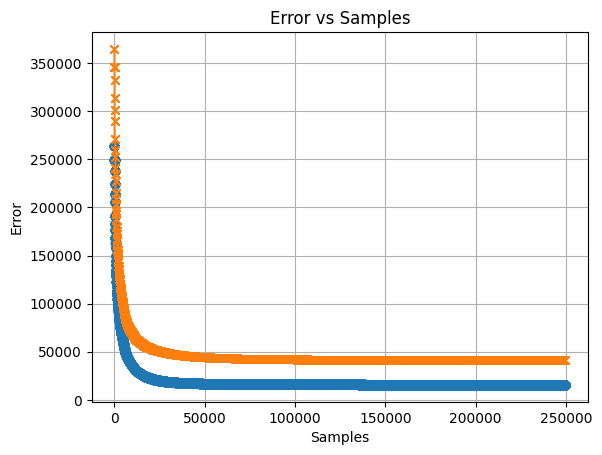

In [25]:
model.test_errors
epochs = list(model.train_errors.keys())
errors = list(model.train_errors.values())

plt.plot(epochs, errors, marker='o')
epochs = list(model.test_errors.keys())
errors = list(model.test_errors.values())
plt.plot(epochs, errors, marker='x')
plt.title('Error vs Samples')
plt.xlabel('Samples')
plt.ylabel('Error')
plt.grid(True)
plt.show()

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a_values = np.linspace(min(train.to_numpy()[:, 0]), max(train.to_numpy()[:, 0]), 100)
b_values = np.linspace(min(test.to_numpy()[:, 1]), max(train.to_numpy()[:, 1]), 100)
a_mesh, b_mesh = np.meshgrid(a_values, b_values)

prediction_points = np.c_[a_mesh.ravel(), b_mesh.ravel()]
predictions = model.predict(prediction_points)
predictions_surface = predictions.reshape(a_mesh.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(a_mesh, b_mesh, predictions_surface, cmap='viridis')

# ax.scatter((train+test .to_numpy()[:, 0], train.to_numpy()[:, 1], train['Weight'].to_numpy(), color='blue', marker='o')

ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Predicted Weight')

plt.title('3D Surface Plot of Polynomial Regression Model Predictions')
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

## R2 value

In [26]:
from __future__ import division 
import numpy as np

def compute_r2(y_true, y_predicted):
    sse = sum((y_true - y_predicted)**2)
    tse = (len(y_true) - 1) * np.var(y_true, ddof=1)
    r2_score = 1 - (sse / tse)
    return r2_score, sse, tse

y_pred = model.predict(np.array(test.drop(['Weight'], axis=1)))
y_actual = test['Weight']
compute_r2(y_actual, y_pred)[0]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [27]:
# Plotting the 45-degree line
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], linestyle='--', color='gray', label='45-degree line')

# Scatter plot for y_pred and y_actual
plt.scatter(y_actual, y_pred, color='blue', label='Scatter plot')

# Adding labels and title
plt.xlabel('y_actual')
plt.ylabel('y_pred')
plt.title('Scatter plot of y_pred vs y_actual')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

NameError: name 'y_actual' is not defined